# Install & import packages

In [1]:
!pip install matplotlib
!pip install pandas
!pip install openpyxl

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# EDA & Preprocessing

In [3]:
df = pd.read_csv("./csv/SUS 5200 B1 PMU S SMDB E12 11 S.csv")
df = df.iloc[::-1].reset_index(drop = True)

### Set Date Time column as index

In [4]:
df["Date Time"] = pd.to_datetime(df["Date Time"])
df.set_index("Date Time", inplace = True)

In [5]:
df.head()

,Y Phase SUS 5200 B1 PMU S SMDB E12 11 SA04 DB AVoltage (volt),Power Factor,Total Energy (kilowatt hour),Power (kilowatt),Y Phase Current (ampere),B Phase Current (ampere),R Phase Current (ampere),R Phase Voltage (volt),B Phase Voltage (volt),Frequency (hertz)
Date Time,,,,,,,,,,
2024-07-24 13:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-07-24 13:59:00,232.6,0.9,139545.4,14.1,20.9,21.9,28.6,232.0,232.9,50.0
2024-07-24 14:01:00,232.7,1.0,139546.0,17.6,27.4,22.4,34.8,NaN,233.0,NaN
2024-07-24 14:04:00,232.6,NaN,139547.0,17.4,27.1,21.4,34.3,NaN,232.9,NaN
2024-07-24 14:07:00,NaN,NaN,139548.1,19.4,26.8,22.5,42.7,NaN,232.8,NaN


In [6]:
df.tail()

,Y Phase SUS 5200 B1 PMU S SMDB E12 11 SA04 DB AVoltage (volt),Power Factor,Total Energy (kilowatt hour),Power (kilowatt),Y Phase Current (ampere),B Phase Current (ampere),R Phase Current (ampere),R Phase Voltage (volt),B Phase Voltage (volt),Frequency (hertz)
Date Time,,,,,,,,,,
2024-08-31 23:24:00,236.4,0.9,150785.8,NaN,12.9,NaN,NaN,NaN,236.5,50.0
2024-08-31 23:32:00,236.3,NaN,150787.1,7.2,11.6,NaN,16.1,NaN,236.7,NaN
2024-08-31 23:44:00,236.5,NaN,150788.1,7.3,12.0,12.0,16.0,235.8,236.6,NaN
2024-08-31 23:51:00,236.4,NaN,150789.2,7.2,11.4,12.2,16.3,236.2,236.7,NaN
2024-08-31 23:59:00,236.6,0.9,150790.1,8.6,16.9,12.3,15.9,NaN,236.8,50.0


In [7]:
df = df.iloc[1:]
df_origin = df.copy()

### Study intervals

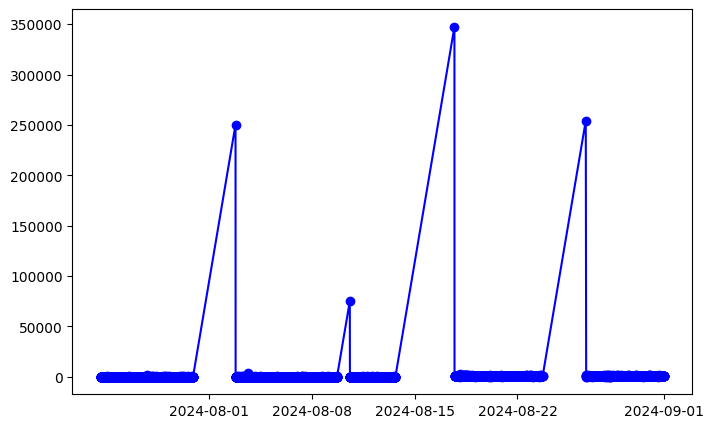

In [8]:
time_diffs = df.index.to_series().diff().dt.total_seconds()

plt.figure(figsize = (8, 5))
plt.plot(df.index, time_diffs, marker='o', linestyle='-', color='b', label='Value')

(array([8.092e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([6.0000e+01, 1.7430e+04, 3.4800e+04, 5.2170e+04, 6.9540e+04,
        8.6910e+04, 1.0428e+05, 1.2165e+05, 1.3902e+05, 1.5639e+05,
        1.7376e+05, 1.9113e+05, 2.0850e+05, 2.2587e+05, 2.4324e+05,
        2.6061e+05, 2.7798e+05, 2.9535e+05, 3.1272e+05, 3.3009e+05,
        3.4746e+05]),
 <BarContainer object of 20 artists>)

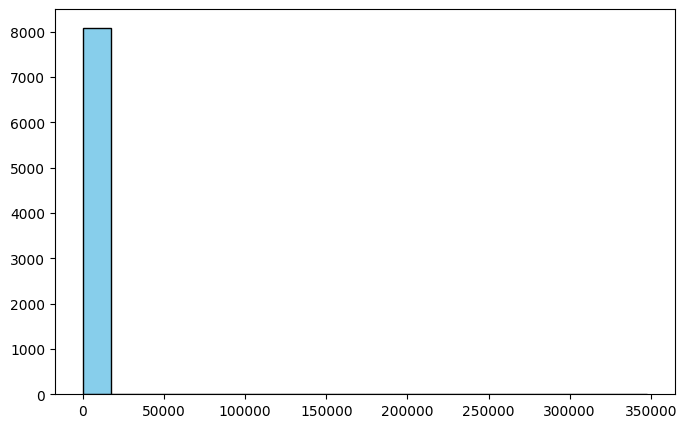

In [9]:
time_diffs = time_diffs.dropna()

plt.figure(figsize = (8, 5))
plt.hist(time_diffs, bins = 20, color = 'skyblue', edgecolor = 'black')

<Axes: xlabel='Date Time'>

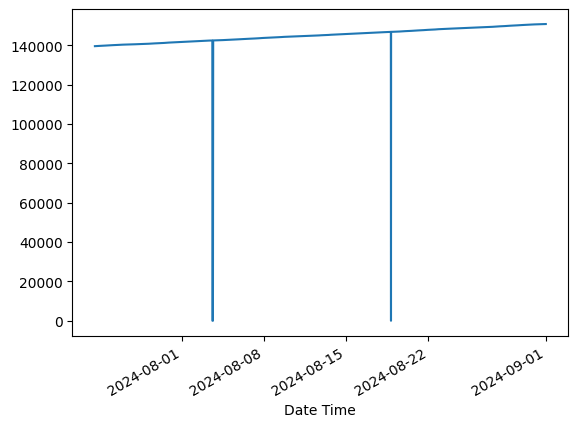

In [10]:
df["Total Energy (kilowatt hour)"].plot()

<Axes: xlabel='Date Time'>

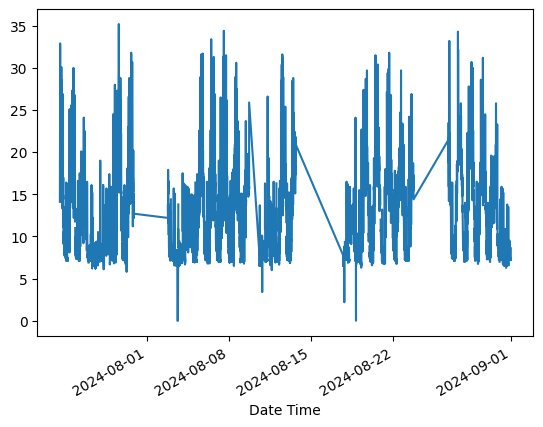

In [11]:
df["Power (kilowatt)"].plot()

In [12]:
def fill_missing_and_zero(colname):
    mv = df[df[colname] != 0][colname].mean()
    df[colname] = df[colname].apply(lambda x: mv if x == 0 or pd.isna(x) else x)
    return df[colname]

In [13]:
#fill_missing_and_zero("Total Energy (kilowatt hour)").plot() # Total energy doesn't make sense for our target.

<Axes: xlabel='Date Time'>

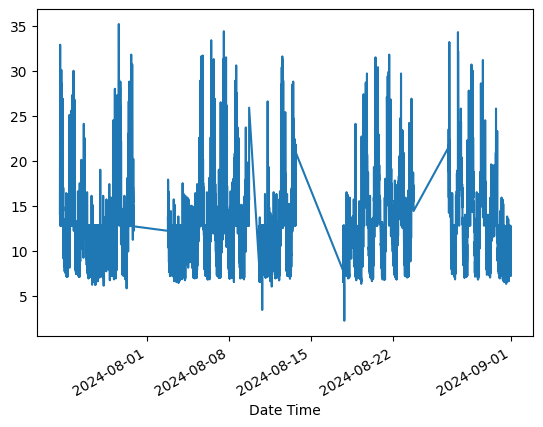

In [14]:
fill_missing_and_zero("Power (kilowatt)").plot()

<Axes: xlabel='Date Time'>

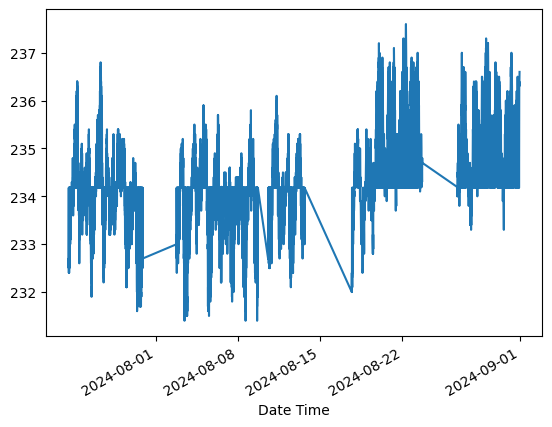

In [15]:
fill_missing_and_zero("Y Phase SUS 5200 B1 PMU S SMDB E12 11 SA04 DB AVoltage (volt)").plot()

<Axes: xlabel='Date Time'>

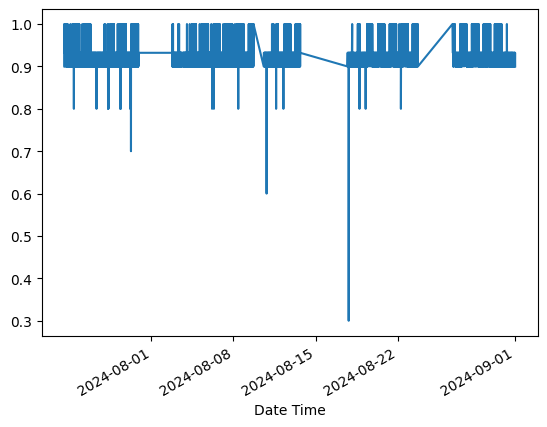

In [16]:
fill_missing_and_zero("Power Factor ").plot()

<Axes: xlabel='Date Time'>

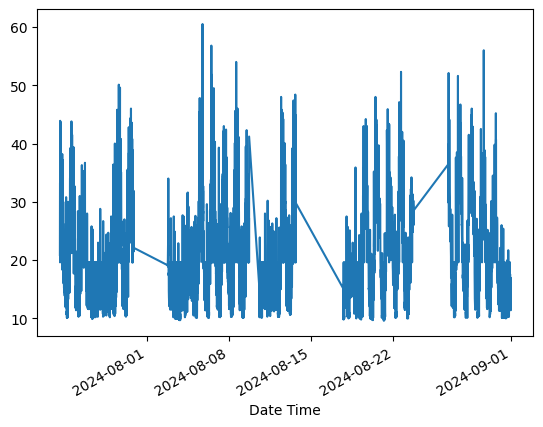

In [17]:
fill_missing_and_zero("Y Phase Current (ampere)").plot()

<Axes: xlabel='Date Time'>

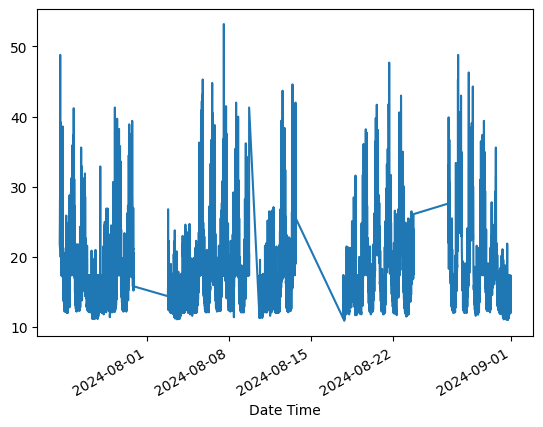

In [18]:
fill_missing_and_zero("B Phase Current (ampere)").plot()

<Axes: xlabel='Date Time'>

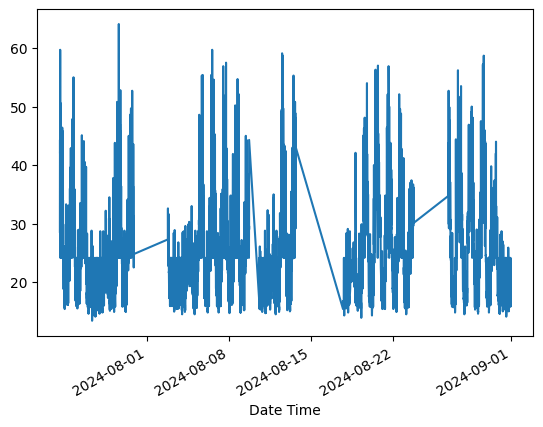

In [19]:
fill_missing_and_zero("R Phase Current (ampere)").plot()

<Axes: xlabel='Date Time'>

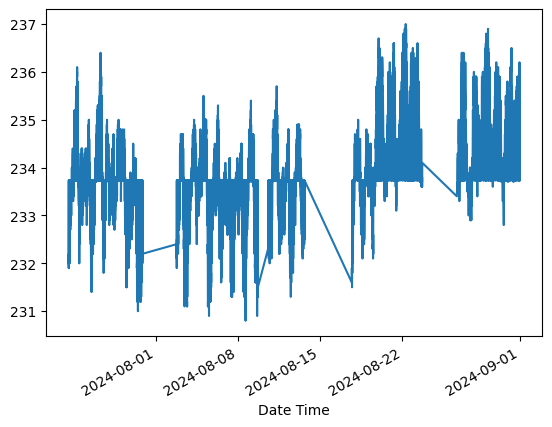

In [20]:
fill_missing_and_zero("R Phase Voltage (volt)").plot()

<Axes: xlabel='Date Time'>

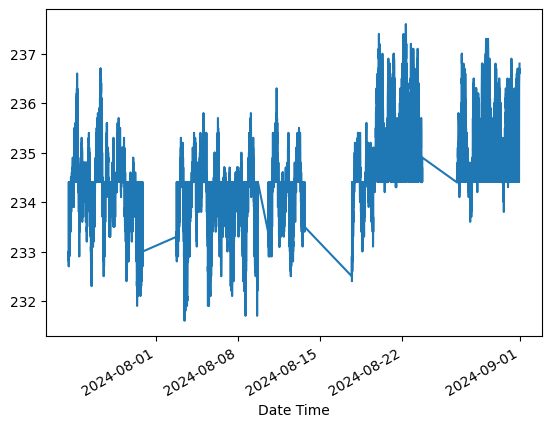

In [21]:
fill_missing_and_zero("B Phase Voltage (volt)").plot()

<Axes: xlabel='Date Time'>

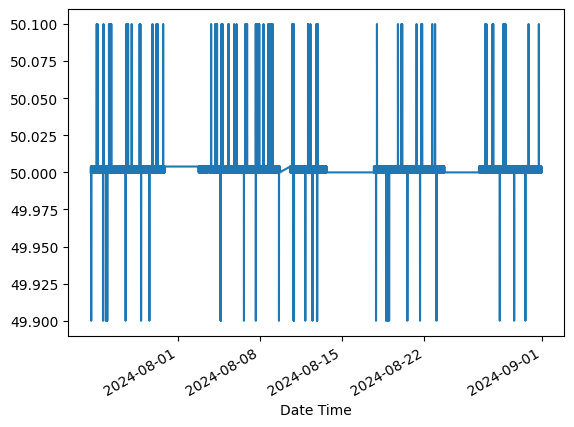

In [22]:
fill_missing_and_zero("Frequency (hertz)").plot()

In [23]:
df.to_csv("./cleaned/SUS 5200 B1 PMU S SMDB E12 11 S.csv", header = True)

In [24]:
df.columns

Index(['Y Phase SUS 5200 B1 PMU S SMDB E12 11 SA04 DB AVoltage (volt)',
       'Power Factor ', 'Total Energy (kilowatt hour)', 'Power (kilowatt)',
       'Y Phase Current (ampere)', 'B Phase Current (ampere)',
       'R Phase Current (ampere)', 'R Phase Voltage (volt)',
       'B Phase Voltage (volt)', 'Frequency (hertz)'],
      dtype='object')

In [25]:
def get_normalized(mode):
    norm_df = df.copy()
    
    if mode == "minmax":
        for col in norm_df.columns:
            min_value = norm_df[col].min()
            max_value = norm_df[col].max()            
            norm_df[col] = (norm_df[col] - min_value) / (max_value - min_value)
    elif mode == "zscore":
        for col in norm_df.columns:
            mean = norm_df[col].mean()
            std = norm_df[col].std()            
            norm_df[col] = (norm_df[col] - mean) / std
    else:
        print("Unsupported normalization method.")
        norm_df = None

    return norm_df

In [26]:
norm_df_mm = get_normalized("minmax")
norm_df_z = get_normalized("zscore")

In [27]:
norm_df_mm.to_csv("./norm-mm/SUS 5200 B1 PMU S SMDB E12 11 S.csv", header = True)
norm_df_z.to_csv("./norm-z/SUS 5200 B1 PMU S SMDB E12 11 S.csv", header = True)